<a href="https://colab.research.google.com/github/abdullatifm1127/PCVK_GANJIL_2025/blob/main/Week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


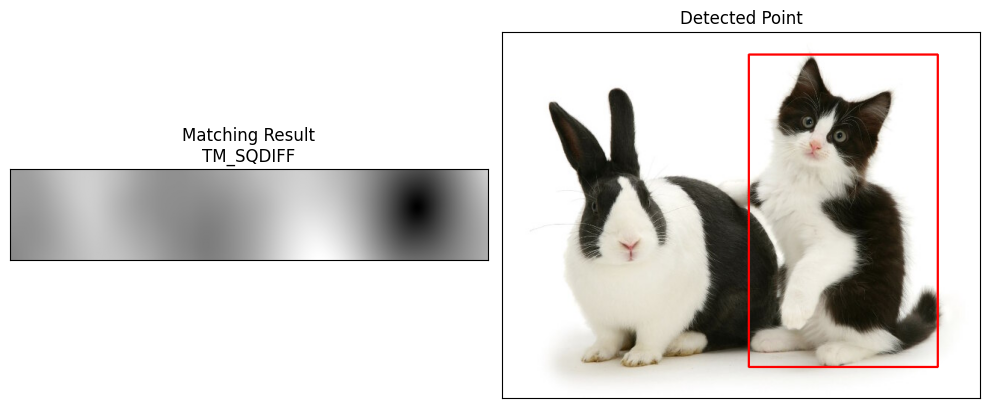

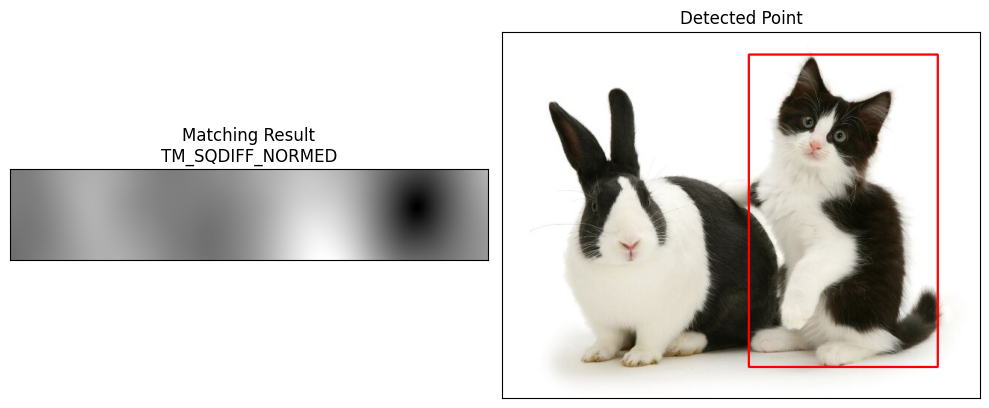

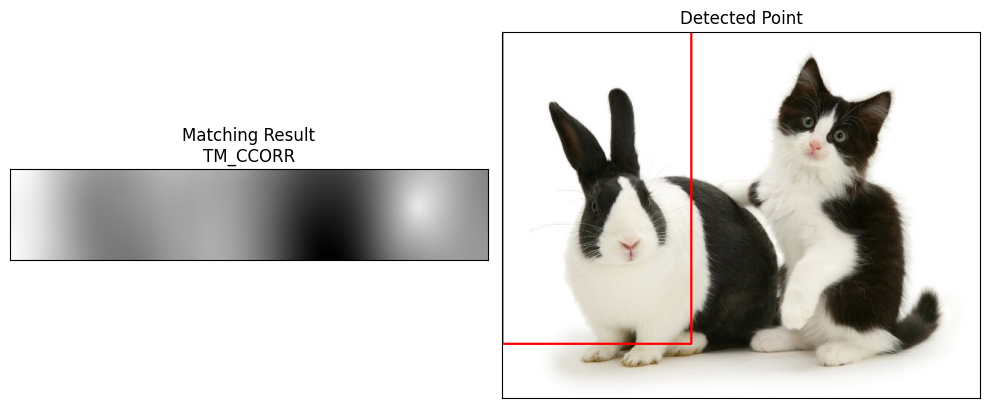

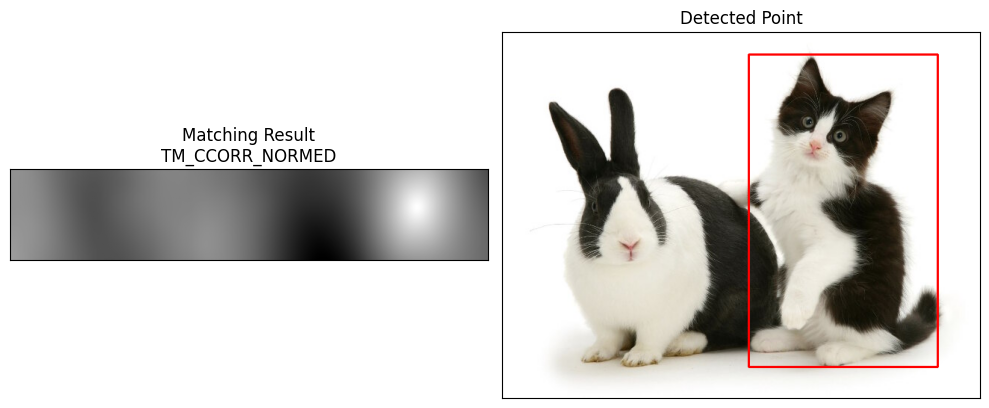

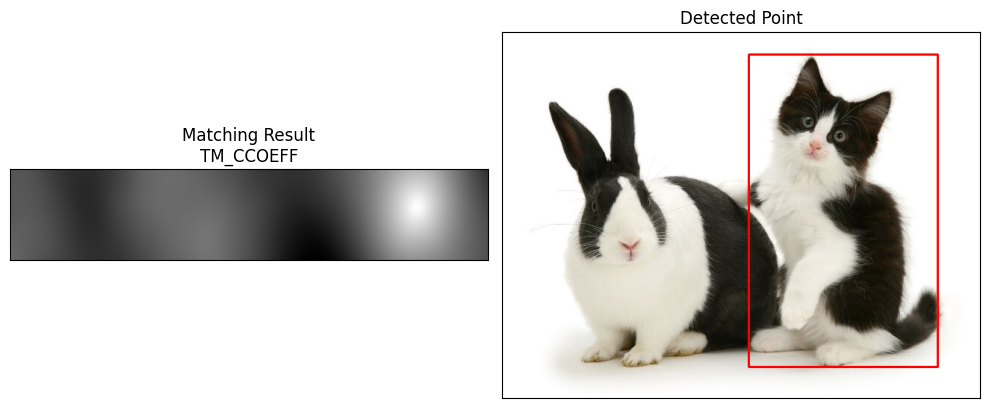

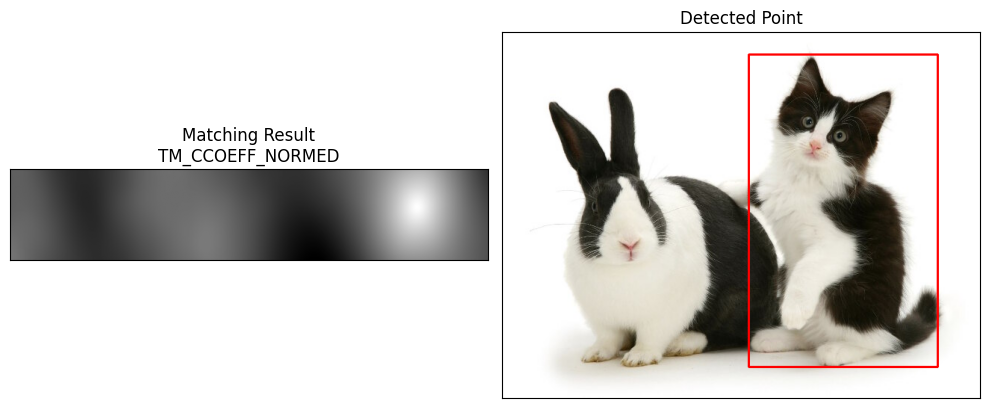

In [2]:
img = cv2.imread('/content/drive/MyDrive/Tugas PCVK/cat-and-rabbit.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

template = cv2.imread('/content/drive/MyDrive/Tugas PCVK/cat-template.jpg', 0)
h, w = template.shape

methods = [
    cv2.TM_SQDIFF,
    cv2.TM_SQDIFF_NORMED,
    cv2.TM_CCORR,
    cv2.TM_CCORR_NORMED,
    cv2.TM_CCOEFF,
    cv2.TM_CCOEFF_NORMED
]

titles = [
    "TM_SQDIFF",
    "TM_SQDIFF_NORMED",
    "TM_CCORR",
    "TM_CCORR_NORMED",
    "TM_CCOEFF",
    "TM_CCOEFF_NORMED"
]

for method, title in zip(methods, titles):

    img_copy = img.copy()

    result = cv2.matchTemplate(img_gray, template, method)

    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc

    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv2.rectangle(img_copy, top_left, bottom_right, (0, 0, 255), 2)

    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.title(f"Matching Result\n{title}")
    plt.imshow(result, cmap='gray')
    plt.xticks([]); plt.yticks([])

    plt.subplot(1, 2, 2)
    plt.title("Detected Point")
    plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB))
    plt.xticks([]); plt.yticks([])

    plt.tight_layout()
    plt.show()


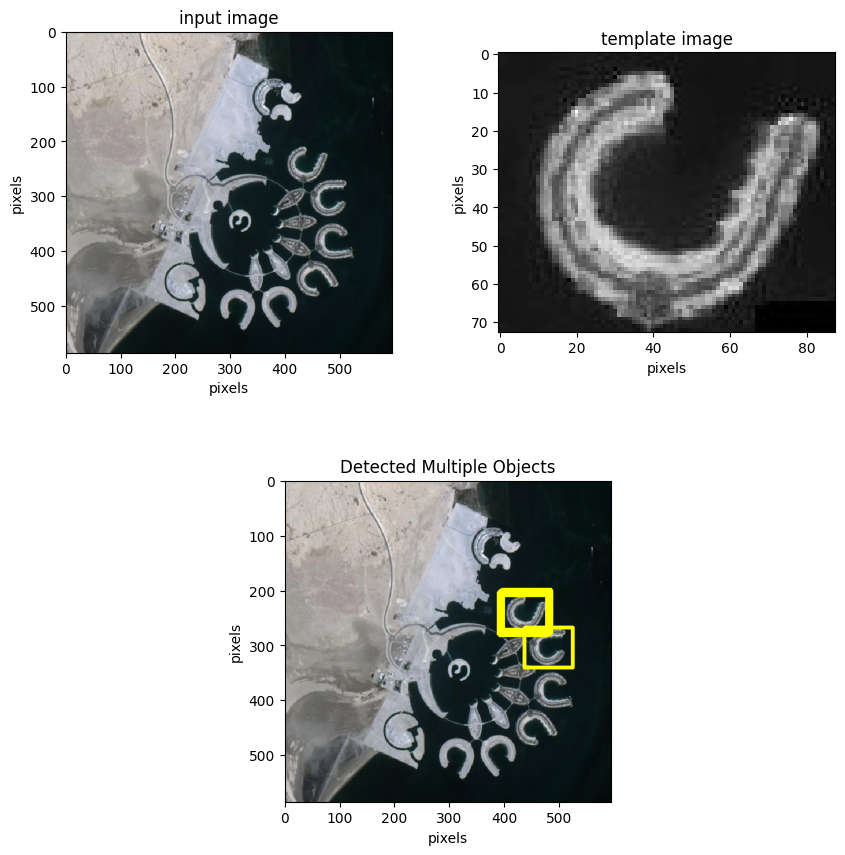

In [9]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# -------------------------------------------------------------
# 1. Load image dan template
# -------------------------------------------------------------
img = cv2.imread('/content/drive/MyDrive/Tugas PCVK/bahrain.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY).astype(np.float32)

template = cv2.imread('/content/drive/MyDrive/Tugas PCVK/bahrain-template.jpg', 0).astype(np.float32)

th, tw = template.shape

# -------------------------------------------------------------
# 2. Manual Normalized Cross-Correlation (tanpa OpenCV)
# -------------------------------------------------------------
def normalized_cross_correlation(image, template):
    ih, iw = image.shape
    th, tw = template.shape

    result = np.zeros((ih - th + 1, iw - tw + 1), dtype=np.float32)

    template_mean = template.mean()
    template_std = template.std()

    for y in range(ih - th + 1):
        for x in range(iw - tw + 1):

            patch = image[y:y+th, x:x+tw]
            patch_mean = patch.mean()
            patch_std = patch.std()

            if patch_std == 0:
                result[y, x] = 0
                continue

            numerator = np.sum((patch - patch_mean) * (template - template_mean))
            denominator = (th * tw - 1) * template_std * patch_std

            result[y, x] = numerator / denominator

    return result

result = normalized_cross_correlation(img_gray, template)

# -------------------------------------------------------------
# 3. Threshold untuk multiple detection
# -------------------------------------------------------------
threshold = 0.55
points = np.where(result >= threshold)

# -------------------------------------------------------------
# 4. Gambar bounding box
# -------------------------------------------------------------
img_result = img.copy()

for y, x in zip(points[0], points[1]):
    cv2.rectangle(img_result, (x, y), (x + tw, y + th), (0, 255, 255), 3)

# -------------------------------------------------------------
# 5. Tampilkan hasil seperti contoh layout
# -------------------------------------------------------------
plt.figure(figsize=(10, 10))

# Baris pertama: input image (kiri) dan template image (kanan)
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("input image")
plt.xlabel("pixels")
plt.ylabel("pixels")

plt.subplot(2, 2, 2)
plt.imshow(template, cmap='gray')
plt.title("template image")
plt.xlabel("pixels")
plt.ylabel("pixels")

# Baris kedua: Detected Multiple Objects (melebar ke seluruh baris bawah)
plt.subplot(2, 1, 2)
plt.imshow(cv2.cvtColor(img_result, cv2.COLOR_BGR2RGB))
plt.title("Detected Multiple Objects")
plt.xlabel("pixels")
plt.ylabel("pixels")

plt.subplots_adjust(hspace=0.4, wspace=0.3)  # beri jarak seperti di contoh
plt.show()
